In [1]:
import pandas as pd

# Load the dataset (ensure the file is in the working directory)
df = pd.read_csv('Mall_Customers.csv')

# Display the shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (200, 5)


In [2]:
# Display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Scale features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

df_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980


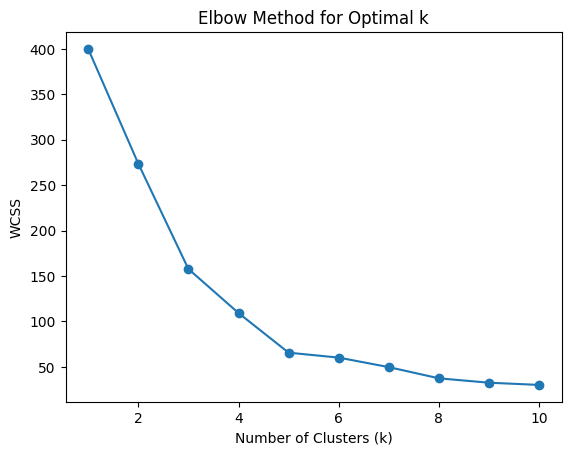

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
X = df_scaled[features]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Applying K-Means Clustering

In [6]:
optimal_k = 5  # Adjust based on elbow plot

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(X)

df_scaled['KMeans_Cluster'].value_counts()

KMeans_Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

## Applying DBSCAN Clustering

In [7]:
from sklearn.cluster import DBSCAN

# DBSCAN parameters may need tuning
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(X)

df_scaled['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64

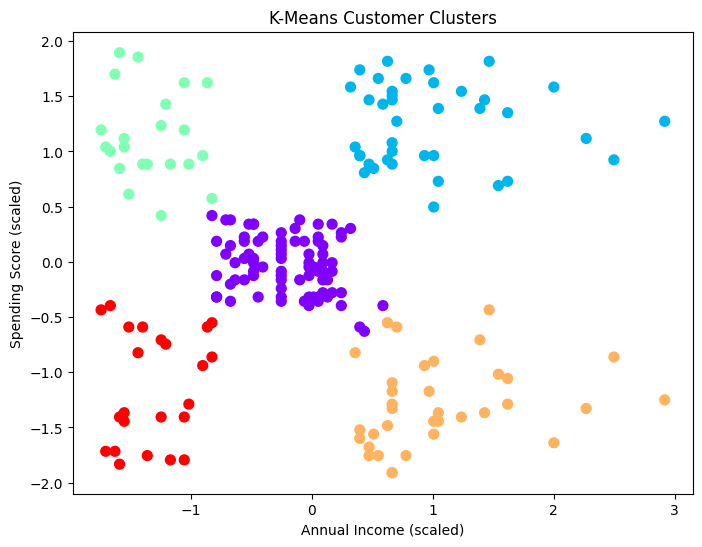

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'],
            c=df_scaled['KMeans_Cluster'], cmap='rainbow', s=50)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('K-Means Customer Clusters')
plt.show()

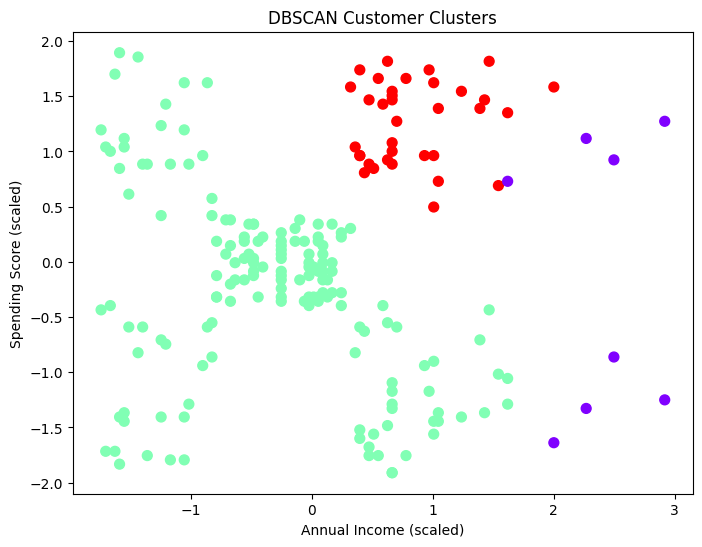

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'],
            c=df_scaled['DBSCAN_Cluster'], cmap='rainbow', s=50)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('DBSCAN Customer Clusters')
plt.show()

## Applying PCA for Dimensionality Reduction

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df_scaled['PC1'] = principal_components[:, 0]
df_scaled['PC2'] = principal_components[:, 1]

df_scaled[['PC1', 'PC2']].head()

,PC1,PC2
0,-1.537109,-0.922207
1,-0.384168,-2.075149
2,-2.416002,0.010665
3,-0.466982,-1.938355
4,-1.455678,-0.895678


## Plot Original vs PCA-Reduced Data

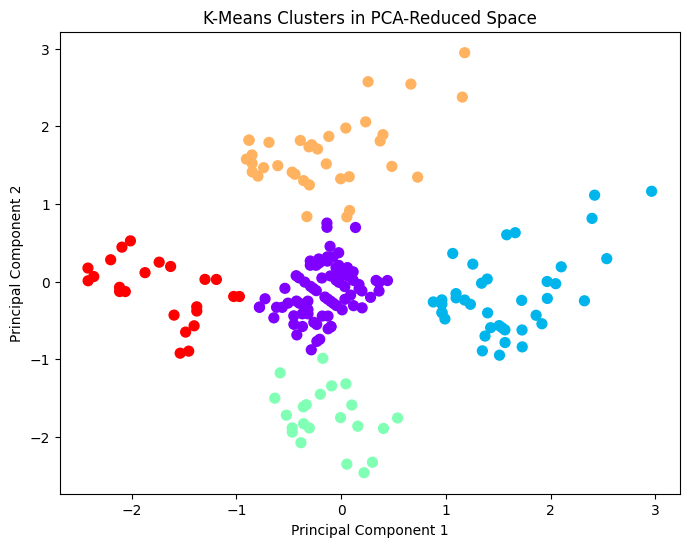

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['PC1'], df_scaled['PC2'],
            c=df_scaled['KMeans_Cluster'], cmap='rainbow', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.show()

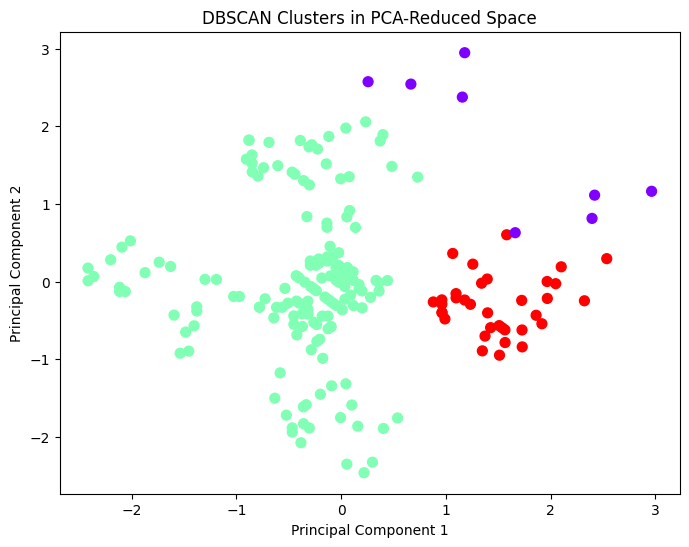

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['PC1'], df_scaled['PC2'],
            c=df_scaled['DBSCAN_Cluster'], cmap='rainbow', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clusters in PCA-Reduced Space')
plt.show()

In [13]:
# K-Means cluster characteristics
for cluster in sorted(df_scaled['KMeans_Cluster'].unique()):
    print(f"\nK-Means Cluster {cluster}:")
    print(df[df_scaled['KMeans_Cluster'] == cluster][features].mean())

# DBSCAN cluster characteristics (excluding noise points labeled as -1)
for cluster in sorted(df_scaled['DBSCAN_Cluster'].unique()):
    if cluster == -1:
        print(f"\nDBSCAN Noise Points: {sum(df_scaled['DBSCAN_Cluster'] == -1)} samples")
    else:
        print(f"\nDBSCAN Cluster {cluster}:")
        print(df[df_scaled['DBSCAN_Cluster'] == cluster][features].mean())


K-Means Cluster 0:
Annual Income (k$)        55.296296
Spending Score (1-100)    49.518519
dtype: float64

K-Means Cluster 1:
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
dtype: float64

K-Means Cluster 2:
Annual Income (k$)        25.727273
Spending Score (1-100)    79.363636
dtype: float64

K-Means Cluster 3:
Annual Income (k$)        88.200000
Spending Score (1-100)    17.114286
dtype: float64

K-Means Cluster 4:
Annual Income (k$)        26.304348
Spending Score (1-100)    20.913043
dtype: float64

DBSCAN Noise Points: 8 samples

DBSCAN Cluster 0:
Annual Income (k$)        52.490446
Spending Score (1-100)    43.101911
dtype: float64

DBSCAN Cluster 1:
Annual Income (k$)        82.542857
Spending Score (1-100)    82.800000
dtype: float64
